In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
data = pd.read_csv("insurance.csv")

In [98]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.duplicated().sum()

1

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Expolartory Data Analysis

In [10]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

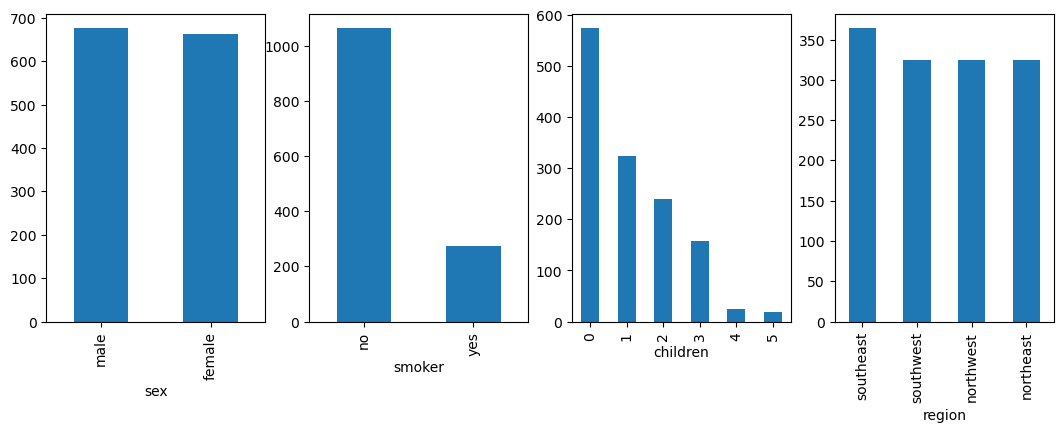

In [28]:
plt.figure(figsize =(13,4))
columns = ["sex","smoker","children","region"]
k = 0
for i in columns:
    k =k+1
    plt.subplot(1,4,k)
    data[i].value_counts().plot(kind='bar')  



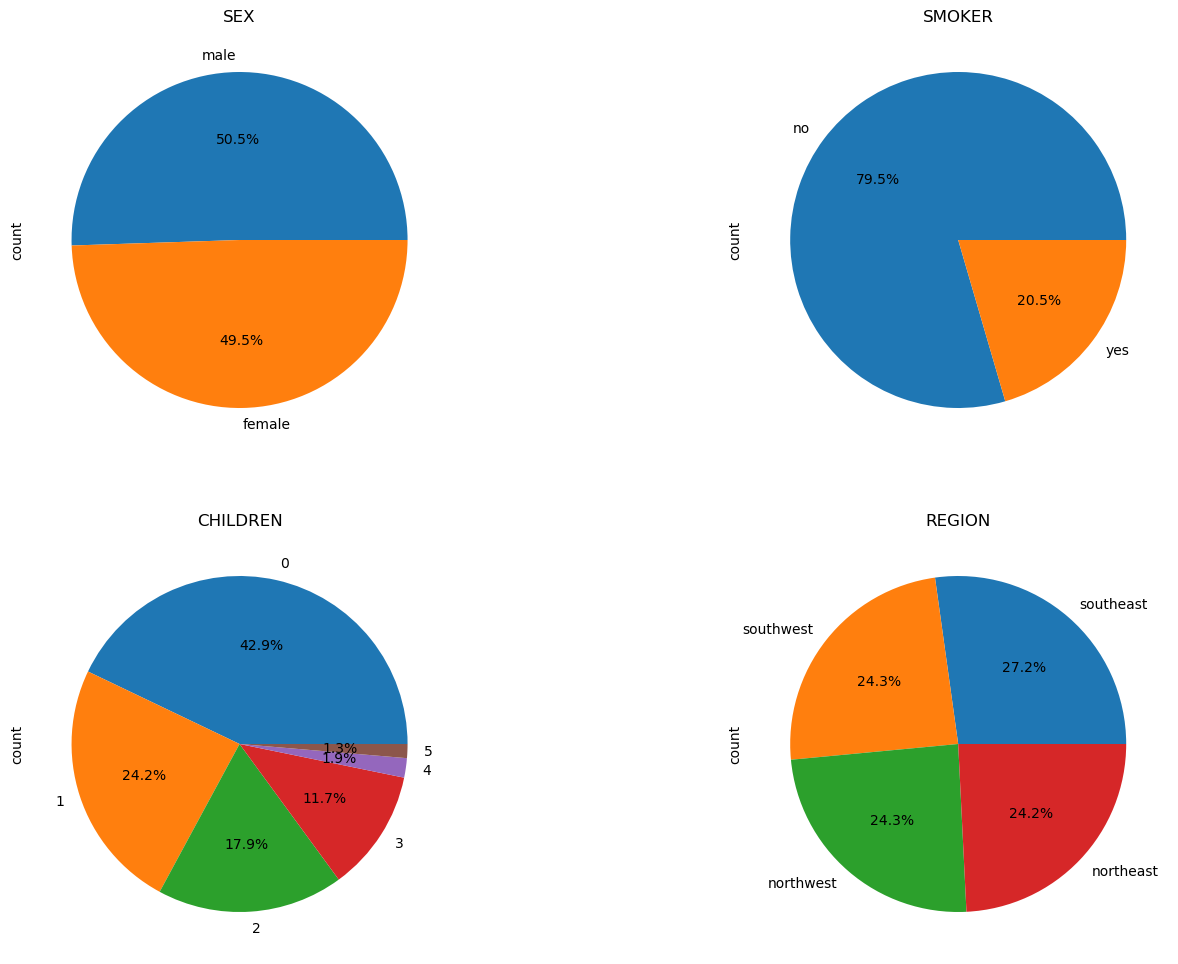

In [40]:
plt.figure(figsize =(17,12))
columns = ["sex","smoker","children","region"]
k = 0
for i in columns:
    k =k+1
    plt.subplot(2,2,k)
    data[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(i.upper())

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

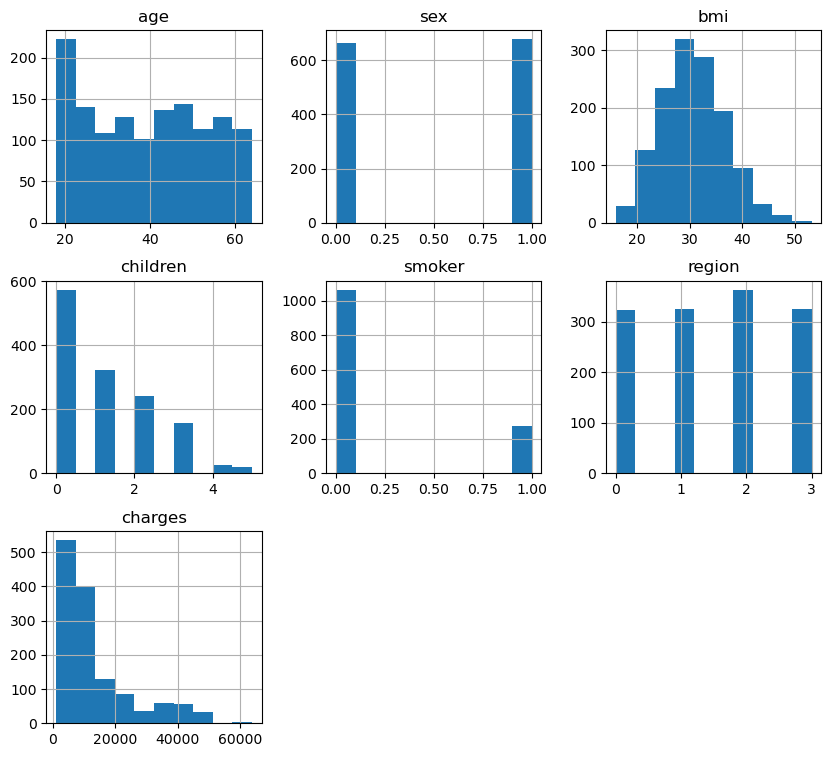

In [48]:
data.hist(figsize=(10,9))

<Axes: >

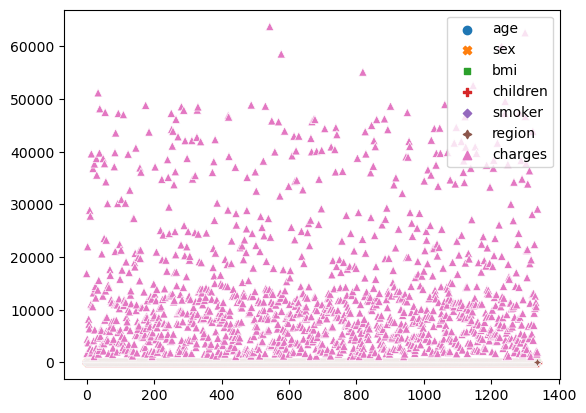

In [52]:
sn.scatterplot(data)

C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


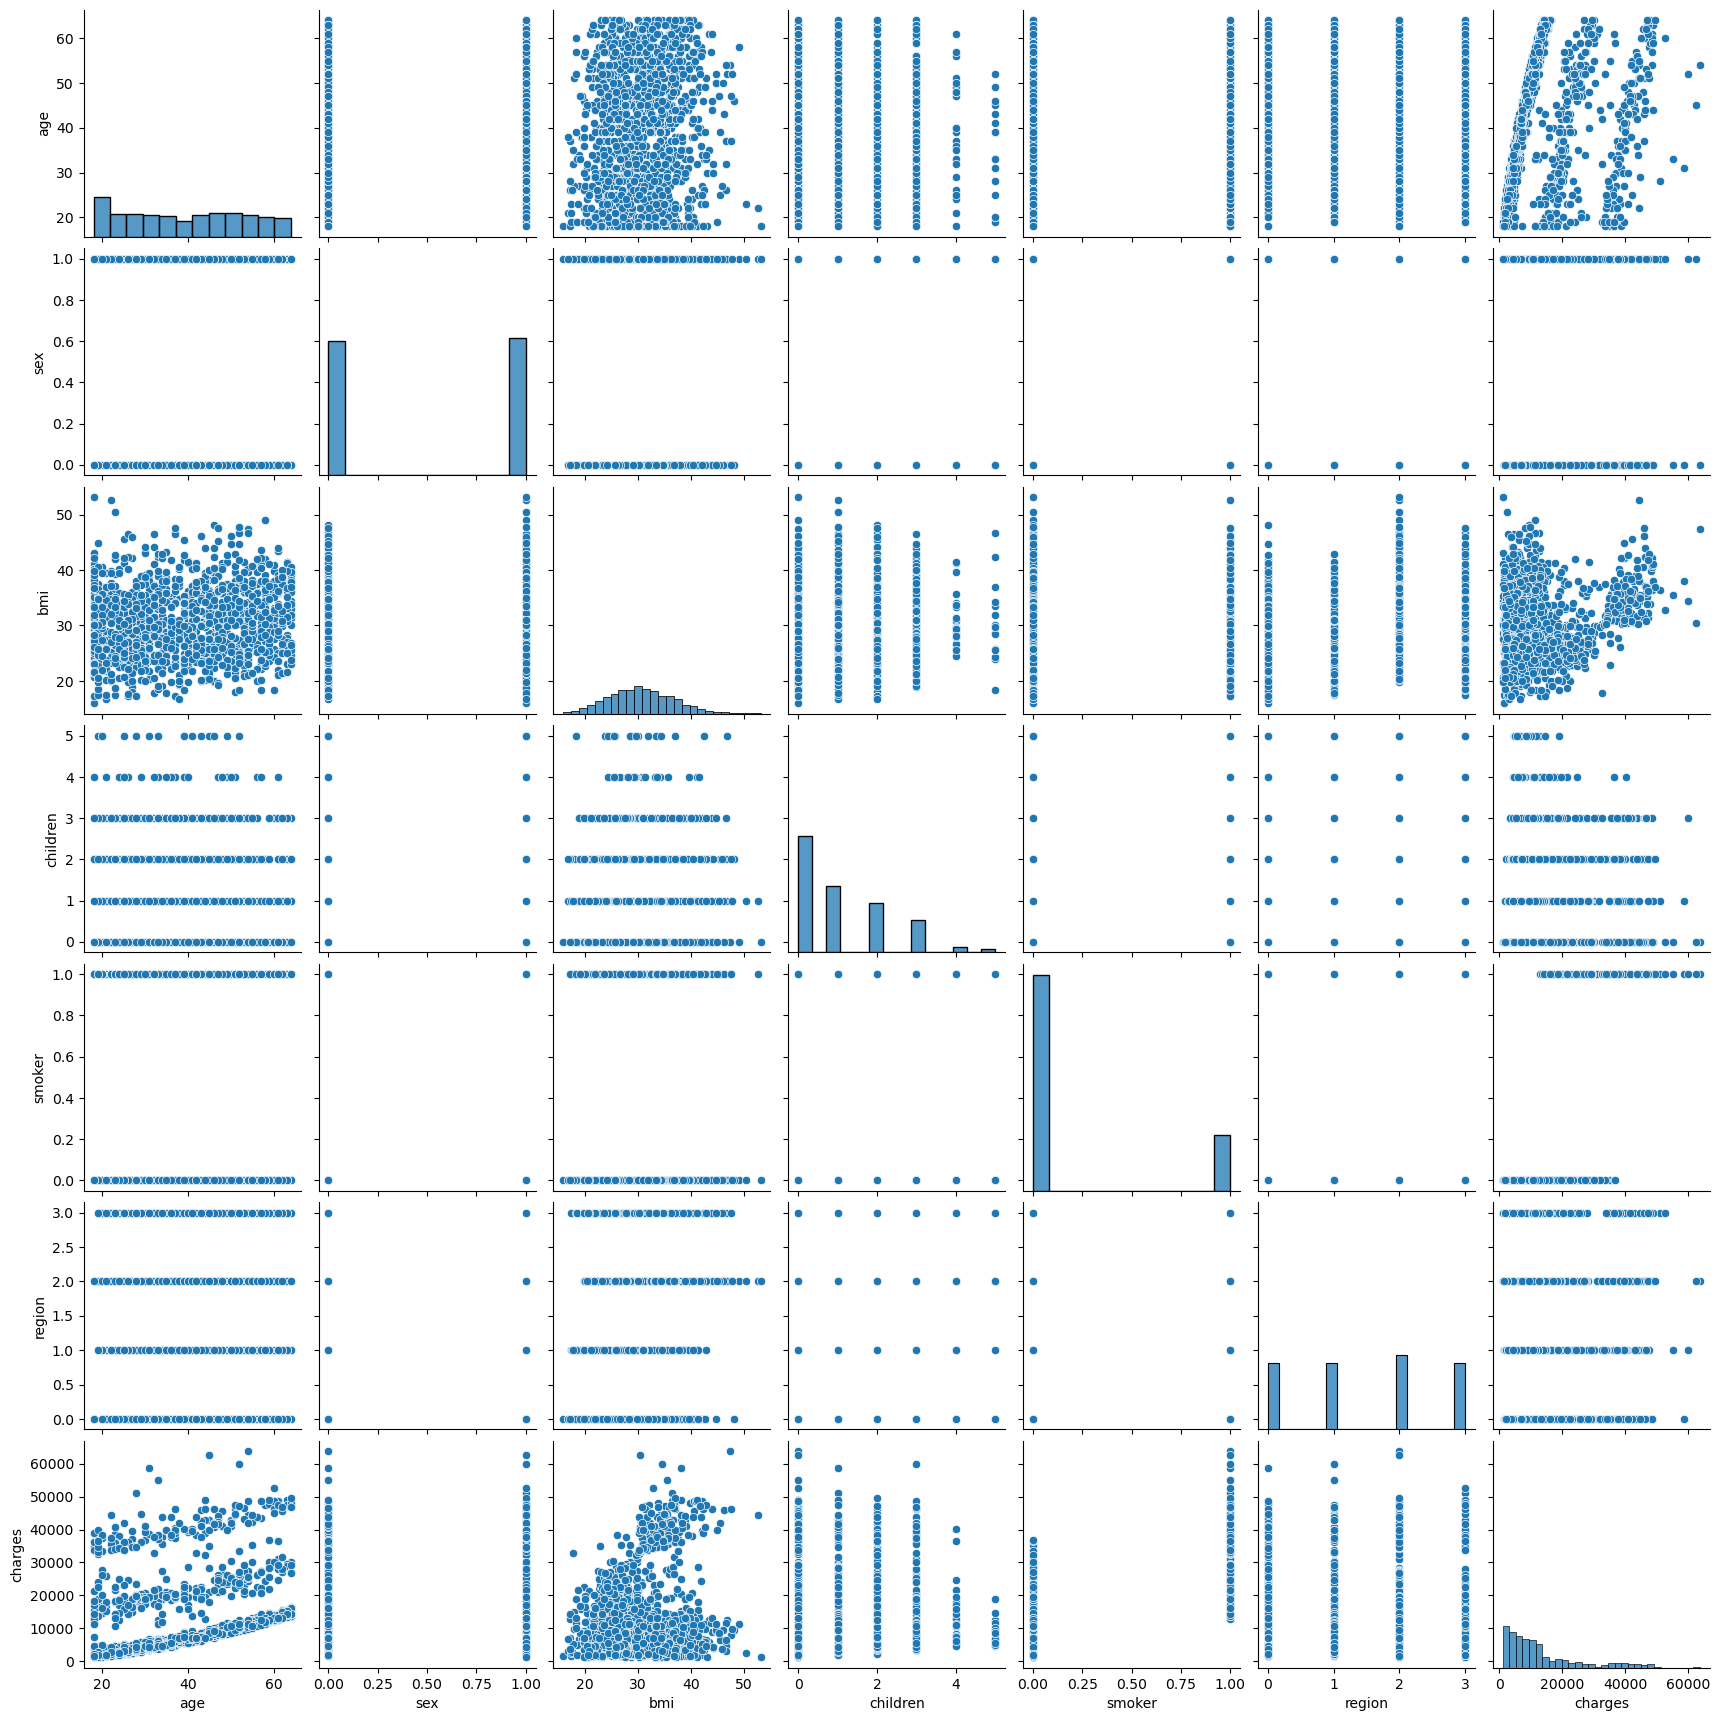

In [68]:
sn.pairplot(data)

In [44]:
# data preprocessing

In [46]:
LabelE= LabelEncoder()
colName = data.select_dtypes(include="object").columns
for i in colName:
    data[i] = LabelE.fit_transform(data[i])

In [ ]:
#train test 

In [49]:
X = data.drop(columns= "charges")
Y =data["charges"]

In [54]:
XTR,XTS,YTR,YTS =train_test_split(X,Y,test_size=0.2,random_state=2)

In [103]:
RM = RandomForestRegressor()

In [104]:
RM.fit(XTR,YTR)

RandomForestRegressor()

In [105]:
PR =RM.predict(XTR)

In [107]:
RM.score(XTR,YTR)*100

97.7093287912476

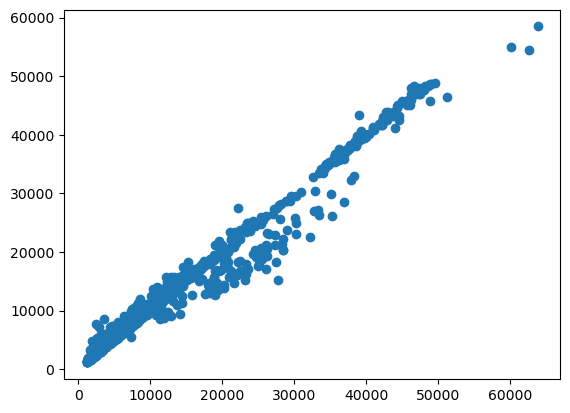

In [108]:
plt.scatter(YTR,PR)

In [109]:
# Model Evualtion 

print(r2_score(YTR,PR))
print(mean_absolute_error(YTR,PR))

0.977093287912476
987.6318086003273


In [111]:
# Making Predict system

input = (32,1,28.880,0,0,1)
inputV = np.asarray(input).reshape(1,-1)
predict =RM.predict(inputV)
print(predict)

[3854.0909205]


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
